In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
n = 100     #formerly grid_size
grid = np.zeros([n, n], dtype=int)

separation_factor = 2/3     # horizontal separation of the plates
vertical_aspect = 0.8   # amount of vertical grid_size taken up by plate

y1 = int(0.5*n*(1 - vertical_aspect))
y2 = int(0.5*n*(1 + vertical_aspect))
assert 0 <= separation_factor <= 1
assert 0 <= vertical_aspect <= 1
offset = int(separation_factor * (n//2))
grid[y1:y2, offset] = 1
grid[y1:y2, n-offset-1] = -1

In [ ]:
adjacency = np.zeros([n*n, n*n], dtype=int)
for i in range(n*n):
    x1 = i // n
    x2 = i % n
    for j in range(n*n):
        y1 = j // n
        y2 = j % n

        if np.abs(x1-y1) + np.abs(x2 - y2) == 1:
            adjacency[i, j] = 1

In [ ]:
degree = np.zeros_like(adjacency)


for i in range(n*n):

    x1 = i // n
    x2 = i % n
    deg = 4 - (x1 % (n-1) == 0) - (x2 % (n-1) == 0)
    degree[i, i] = deg
laplacian = (degree - adjacency)


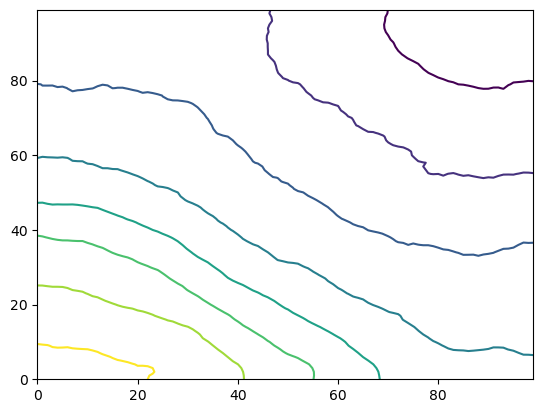

In [356]:
A = laplacian.reshape(10000, 10000)
b = L1.reshape(10000, 1)
x = np.linalg.solve(A, b)

plt.contour(x.reshape(100, 100))
plt.show()

In [358]:
x.reshape(100, 100)

array([[-3.93497022e+17, -3.93497022e+17, -3.93497022e+17, ...,
        -3.93497022e+17, -3.93497022e+17, -3.93497022e+17],
       [-3.93497022e+17, -3.93497022e+17, -3.93497022e+17, ...,
        -3.93497022e+17, -3.93497022e+17, -3.93497022e+17],
       [-3.93497022e+17, -3.93497022e+17, -3.93497022e+17, ...,
        -3.93497022e+17, -3.93497022e+17, -3.93497022e+17],
       ...,
       [-3.93497022e+17, -3.93497022e+17, -3.93497022e+17, ...,
        -3.93497022e+17, -3.93497022e+17, -3.93497022e+17],
       [-3.93497022e+17, -3.93497022e+17, -3.93497022e+17, ...,
        -3.93497022e+17, -3.93497022e+17, -3.93497022e+17],
       [-3.93497022e+17, -3.93497022e+17, -3.93497022e+17, ...,
        -3.93497022e+17, -3.93497022e+17, -3.93497022e+17]])

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (10000, 1)

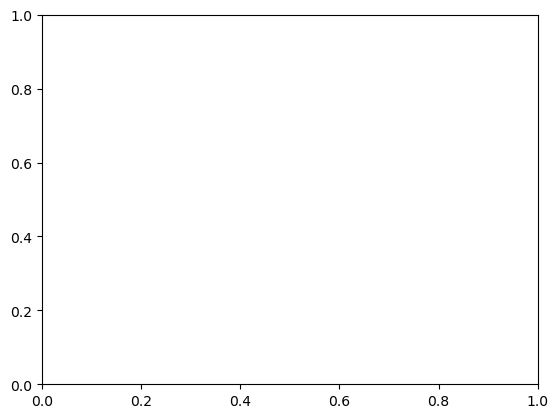

In [351]:
L1 = np.linalg.solve(laplacian, grid.reshape(-1, 1))
plt.contour(L1)
plt.show()

In [337]:
indices = np.argwhere(grid)
L1[indices[:, 0], indices[:, 1]] = grid[indices[:, 0], indices[:, 1]]
for i in range(100):
    L1 = (laplacian @ L1.flatten()).reshape(100, 100)

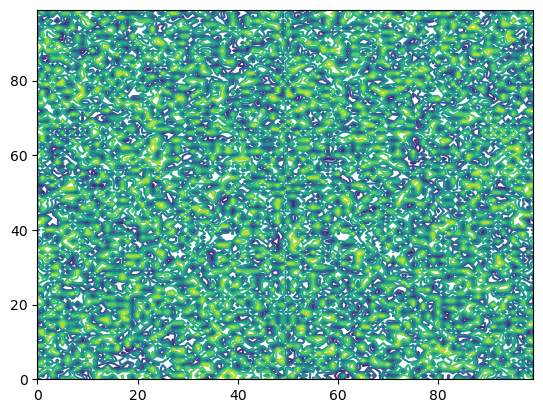

In [338]:
plt.contour(L1)
plt.show()

In [339]:
L1

array([[-1709942830, -1062225684,  -485278608, ...,   485278608,
         1062225684,  1709942830],
       [ 1213043466, -1325895672,  -930586336, ...,   930586336,
         1325895672, -1213043466],
       [-1685799046,  1846913768,  -519422352, ...,   519422352,
        -1846913768,  1685799046],
       ...,
       [  221236842, -1531357448, -1795326496, ...,  1795326496,
         1531357448,  -221236842],
       [ -332797230,  1109287596,  -524362592, ...,   524362592,
        -1109287596,   332797230],
       [  977339666,  1385810516, -1866609628, ...,  1866609628,
        -1385810516,  -977339666]])